# Для начала загрузим необходимые данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

file_path = '/content/.config/train (1).csv'
titanic_data = pd.read_csv(file_path)

## Теперь перейдем к заданиям
### 1. Визуализация распределения значений признаков

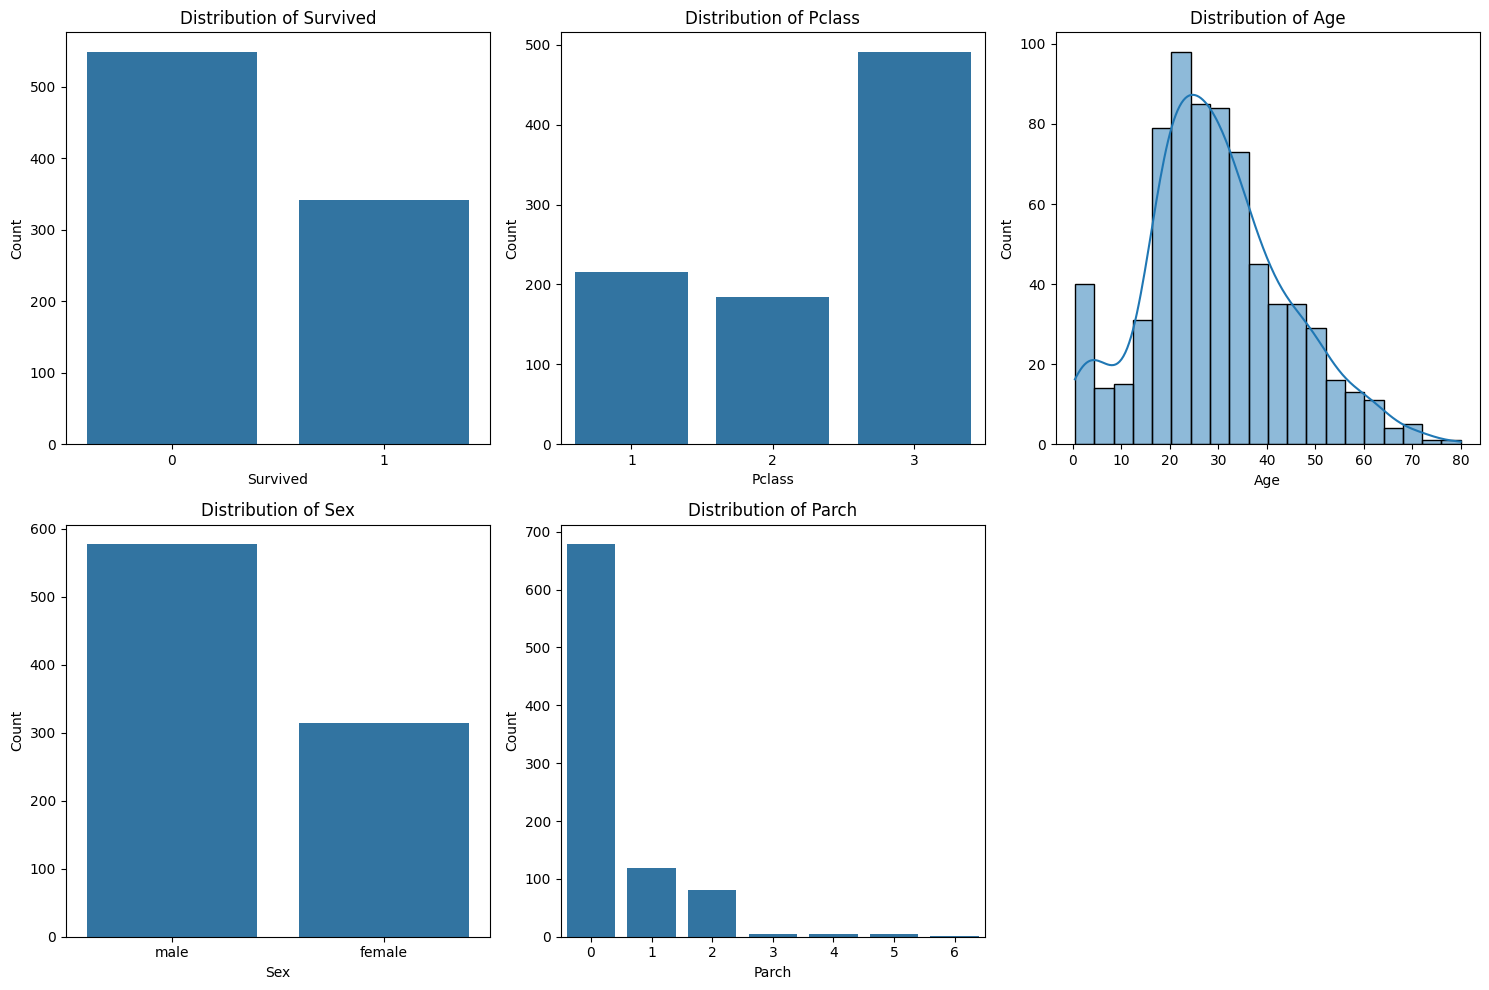

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Survived распределение
sns.countplot(data=titanic_data, x='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Survived')
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_ylabel('Count')

# Pclass распределение
sns.countplot(data=titanic_data, x='Pclass', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Pclass')
axes[0, 1].set_xlabel('Pclass')
axes[0, 1].set_ylabel('Count')

# Age распределение
sns.histplot(titanic_data['Age'].dropna(), bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Age')
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Count')

# Sex распределение
sns.countplot(data=titanic_data, x='Sex', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')

# Parch распределение
sns.countplot(data=titanic_data, x='Parch', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Parch')
axes[1, 1].set_xlabel('Parch')
axes[1, 1].set_ylabel('Count')

# Тут я скрыл лишнюю диаграмму
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 2. Построение boxplot для столбца "Age"

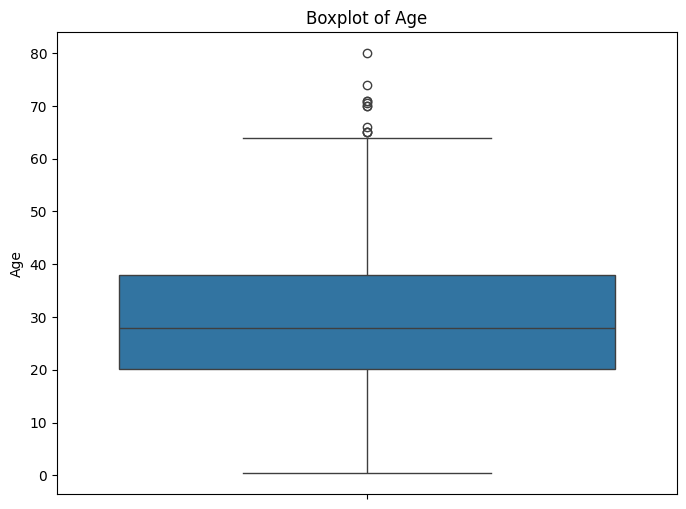

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_data, y='Age')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

График для столбца "Возраст" показывает разброс данных о возрасте, включая медиану (линия внутри рамки), межквартильный размах (сама рамка) и промахи (точки за пределами вертикальной линии). Из графика мы видим следующее:

*  Медианный возраст составляет около 28 лет.
*   Большинство пассажиров находятся в возрасте примерно от 20 до 38 лет (диапазон рамки).
*   Есть несколько выбросов, как младших, так и старших, в частности, несколько детей и несколько пассажиров старше 60 лет.

### 3. Построение круговых диаграмм для Survived и Pclass

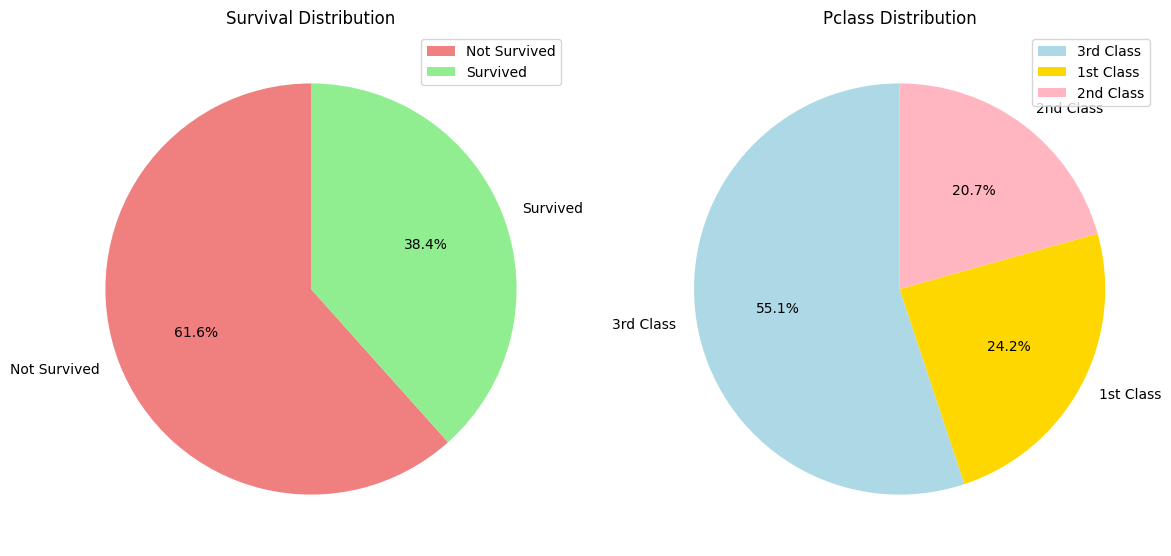

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart для Survived
survived_counts = titanic_data['Survived'].value_counts()
axes[0].pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
axes[0].set_title('Survival Distribution')
axes[0].legend(['Not Survived', 'Survived'], loc='upper right')

# Pie chart для Pclass
pclass_counts = titanic_data['Pclass'].value_counts()
axes[1].pie(pclass_counts, labels=['3rd Class', '1st Class', '2nd Class'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightpink'])
axes[1].set_title('Pclass Distribution')
axes[1].legend(['3rd Class', '1st Class', '2nd Class'], loc='upper right')

plt.tight_layout()
plt.show()

### 4. Построение pairplot для всех числовых переменных

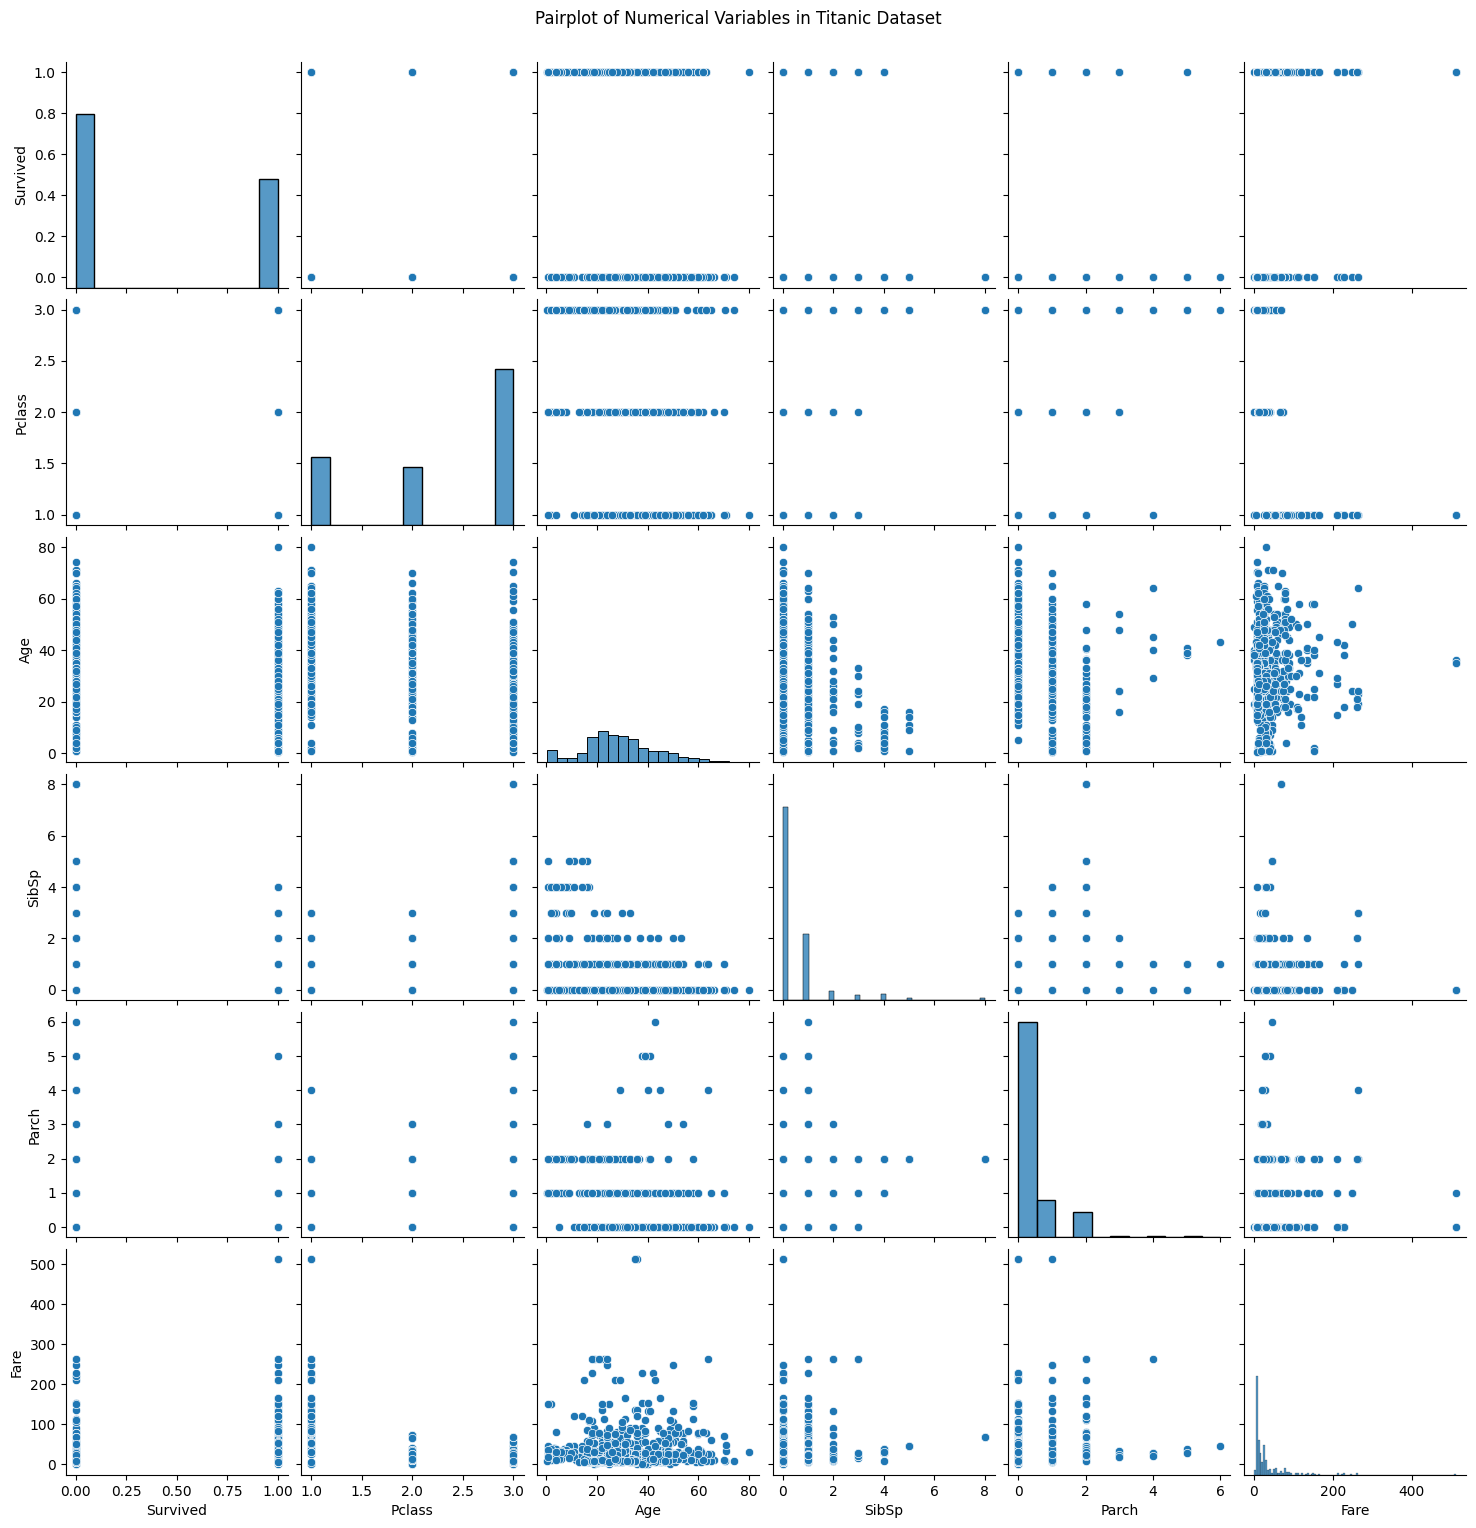

In [11]:
numeric_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(titanic_data[numeric_columns])
plt.suptitle('Pairplot of Numerical Variables in Titanic Dataset', y=1.02)
plt.show()

### 5. Построение интерактивного sunburst графика с помощью plotly

In [12]:
sunburst_data = titanic_data.groupby(['Pclass', 'Sex']).size().reset_index(name='count')

fig = px.sunburst(sunburst_data, path=['Pclass', 'Sex'], values='count',
                  title='Sunburst Plot of Titanic Passengers by Class and Gender')

fig.show()